In [361]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import csv
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score, mean_squared_error
import sympy as sym
#import seaborn as sns

SOURCE_COVID_19 = "https://pomber.github.io/covid19/timeseries.json"
SOURCE_COUNTRIES_BY_POPULATION = "https://raw.githubusercontent.com/samayo/country-json/master/src/country-by-population.json"
SOURCE_GDP = "https://raw.githubusercontent.com/datasets/gdp/master/data/gdp.csv"
SOURCE_GDP_PER_CAPITA_JSON = "https://pkgstore.datahub.io/world-bank/ny.gdp.pcap.cd/data_json/data/5fa3074284c7b57091aa9bacc502ecb5/data_json.json"
SOURCE_GDP_PER_CAPITA_CSV = "https://datahub.io/world-bank/ny.gdp.pcap.cd/r/data.csv"
def get_data_json(source):
    return requests.get(source).json()

In [362]:
np.warnings.filterwarnings('ignore')

In [363]:
data = requests.get(SOURCE_COVID_19).json()

In [364]:
df = pd.DataFrame.from_dict(data)

In [365]:
def get_average_speed_of_propagation_list(data,status ='confirmed', days = len(data[list(data.keys())[0]]), reverse = False):
    min_days = days
    speed = {}
    for key in data:
        if(len(data[key]) < min_days):
            min_days = len(data[key])
    for key in data:
        speed[key] = round(data[key][min_days - 1][status] / min_days,3)
    speed = {key:value for key, value in sorted(speed.items(), key = lambda item:item[1], reverse = reverse)}
    return speed

In [366]:
def get_average_speed_of_propagation_list_non_zero_days(df,status ='confirmed', reverse = False , count = len(df.columns)):
    speed = {}
    for country_name in df.columns[:count]:
        country = pd.DataFrame.from_dict(data[country_name])
        country = country.loc[country[status] > 0 , ['date',status]].reset_index(drop = True)
        country.index = country.index + 1 # если что, убрать
        if country.empty:
            continue
        speed[country_name] = round(country.iloc[len(country)-1][status] / len(country) , 3)
    speed = {key:value for key, value in sorted(speed.items(), key = lambda item:item[1], reverse = reverse)}
    return speed

In [367]:
get_average_speed_of_propagation_list_non_zero_days(df,status ='deaths', reverse = False)


{'Gambia': 0.018,
 'Brunei': 0.019,
 'Botswana': 0.02,
 'Liechtenstein': 0.022,
 'Suriname': 0.022,
 'Burundi': 0.028,
 'West Bank and Gaza': 0.037,
 'MS Zaandam': 0.042,
 'Benin': 0.047,
 'Belize': 0.047,
 'Cabo Verde': 0.054,
 'Angola': 0.059,
 'Syria': 0.059,
 'Eswatini': 0.061,
 'Libya': 0.064,
 'Zimbabwe': 0.07,
 'Antigua and Barbuda': 0.071,
 'Malawi': 0.071,
 'Taiwan*': 0.075,
 'Comoros': 0.077,
 'Monaco': 0.078,
 'Mauritania': 0.08,
 'Ethiopia': 0.114,
 'Burma': 0.122,
 'Trinidad and Tobago': 0.145,
 'Diamond Princess': 0.146,
 'Malta': 0.146,
 'Guyana': 0.147,
 'Jamaica': 0.148,
 'Zambia': 0.149,
 'Nicaragua': 0.151,
 'Montenegro': 0.158,
 'Barbados': 0.159,
 'Iceland': 0.159,
 'Costa Rica': 0.164,
 'Mauritius': 0.169,
 'Jordan': 0.17,
 'Sri Lanka': 0.173,
 'Guinea-Bissau': 0.174,
 'Djibouti': 0.179,
 'Gabon': 0.183,
 'Paraguay': 0.186,
 'Bahrain': 0.188,
 'Venezuela': 0.189,
 'Maldives': 0.2,
 'Togo': 0.226,
 'Bahamas': 0.229,
 'Uzbekistan': 0.245,
 'Equatorial Guinea': 0.259

In [368]:
def print_speed_stats(data,days = len(data[list(data.keys())[0]]), reverse = False):
    statuses = ['confirmed' , 'deaths' , 'recovered']
    for i in range(len(statuses)):
        print(f"Статистика за {days} дней:{statuses[i]}")
        speed = get_average_speed_of_propagation_list(data,status = statuses[i],days = days,reverse = reverse)
        print(f"Средняя скорость для {statuses[i]} к {days} дню (человек в день):")
        for key in speed:
            print(f"{key}:{speed[key]}")

In [369]:
# Средняя скорость за все дни( с учётом нулевых)
print_speed_stats(data)

Статистика за 118 дней:confirmed
Средняя скорость для confirmed к 118 дню (человек в день):
Lesotho:0.008
Western Sahara:0.051
Papua New Guinea:0.068
MS Zaandam:0.076
Seychelles:0.093
Suriname:0.093
Comoros:0.093
Holy See:0.102
Saint Kitts and Nevis:0.127
Namibia:0.136
Dominica:0.136
Saint Vincent and the Grenadines:0.144
Fiji:0.153
Saint Lucia:0.153
Belize:0.153
Laos:0.161
Bhutan:0.178
Grenada:0.186
Gambia:0.203
Timor-Leste:0.203
Antigua and Barbuda:0.212
Nicaragua:0.212
Botswana:0.212
Eritrea:0.331
Burundi:0.356
Zimbabwe:0.39
Angola:0.424
Syria:0.492
Libya:0.551
Malawi:0.593
Mauritania:0.686
Liechtenstein:0.695
Barbados:0.746
Bahamas:0.814
Monaco:0.822
Trinidad and Tobago:0.983
Cambodia:1.034
Guyana:1.051
Yemen:1.102
Mongolia:1.186
Brunei:1.195
Mozambique:1.229
Burma:1.619
Eswatini:1.737
Liberia:1.941
Sao Tome and Principe:2.085
Uganda:2.102
South Sudan:2.458
Rwanda:2.517
Madagascar:2.729
Montenegro:2.746
Vietnam:2.746
Central African Republic:2.771
Cabo Verde:2.78
Togo:2.797
Mauriti

In [370]:
def print_speed_stats_non_zero_days(df, reverse = False , count = len(df.columns)):
    statuses = ['confirmed' , 'deaths' , 'recovered']
    for i in range(len(statuses)):
        print(f"Статистика за значимые( ненулевые) дни:{statuses[i]}")
        speed = get_average_speed_of_propagation_list_non_zero_days(df,statuses[i],reverse , count)
        print(f"Средняя скорость для {statuses[i]} (человек в день):")
        for key in speed:
            print(f"{key}:{speed[key]}")

In [371]:
# Средняя скорость за все дни( без нулевых значений)
print_speed_stats_non_zero_days(df)

Статистика за значимые( ненулевые) дни:confirmed
Средняя скорость для confirmed (человек в день):
Papua New Guinea:0.133
Western Sahara:0.136
Holy See:0.162
Seychelles:0.167
Suriname:0.167
Lesotho:0.167
MS Zaandam:0.173
Namibia:0.242
Saint Vincent and the Grenadines:0.258
Saint Lucia:0.273
Saint Kitts and Nevis:0.273
Dominica:0.276
Bhutan:0.284
Fiji:0.295
Belize:0.316
Laos:0.339
Antigua and Barbuda:0.373
Grenada:0.379
Gambia:0.381
Nicaragua:0.41
Timor-Leste:0.414
Botswana:0.5
Comoros:0.579
Eritrea:0.661
Zimbabwe:0.767
Angola:0.833
Burundi:0.857
Syria:1.0
Liechtenstein:1.079
Cambodia:1.08
Libya:1.161
Monaco:1.212
Mauritania:1.227
Barbados:1.397
Malawi:1.489
Bahamas:1.5
Trinidad and Tobago:1.758
Guyana:1.824
Brunei:1.986
Mongolia:2.0
Mozambique:2.5
Vietnam:2.769
Eswatini:3.106
Nepal:3.261
Yemen:3.333
Liberia:3.578
Burma:3.604
Taiwan*:3.729
Uganda:4.203
Togo:4.459
Rwanda:4.5
Central African Republic:5.031
Montenegro:5.143
West Bank and Gaza:5.173
Ethiopia:5.254
Benin:5.297
Mauritius:5.355

In [372]:
def draw_average_speed_of_propagation_list(data,days = len(data[list(data.keys())[0]]), reverse = False):   
    statuses = ['confirmed' , 'deaths' , 'recovered']
    colors = ['yellow' , 'red' ,'green']
    for i in range(3):
        fig , ax = plt.subplots()
        fig =plt.figure(figsize=(50,40))
        speed = get_average_speed_of_propagation_list(data,status = statuses[i],days = days,reverse = reverse)
        countries = list(speed.keys())
        values = list(speed.values())
        ax.bar(countries,values, color=colors[i])
        ax.set_title(f"{statuses[i]} for {days} days") 
        plt.show()
        

In [373]:
def draw_countries_covid_stats(df, count = len(df.columns)):
    for country_name in df.columns[:count]:
        country = df[country_name]
        x = [index for index in country.index]
        y = [obj['confirmed'] for obj in country]
        y1 = [obj['deaths'] for obj in country] 
        y2 = [obj['recovered'] for obj in country] 
        fig, ax = plt.subplots()
        ax.plot(x,y,label="confirmed")
        ax.plot(x,y1,label="deaths")
        ax.plot(x,y2,label="recovered")
        ax.set_title(country_name)  # Add a title to the axes.
        ax.set_xlabel("days")
        ax.set_ylabel("amount")
        ax.legend()

In [374]:
def create_country_stats_excel_file(df):
    writer = pd.ExcelWriter('covid-19.xlsx', engine='xlsxwriter')
    for country_name in df.columns:
        country = pd.DataFrame.from_dict(data[country_name])
        country_name = "".join([c for c in country_name if c.isalpha()])
        country.to_excel(writer ,sheet_name=country_name, index_label="day")
        #country.to_csv(f"{country_name}.csv" , index_label = "day")

In [375]:
def create_country_stats_excel_file_without_zeroes(df, by='confirmed'):
    writer = pd.ExcelWriter(f"covid-19_{by}.xlsx", engine='xlsxwriter')
    for country_name in df.columns:
        country = pd.DataFrame.from_dict(data[country_name])
        country = country.loc[country[by] > 0 , [by,'date']].reset_index(drop = True)
        country.index = country.index + 1 # если что, убрать
        #print(country)
        country_name = "".join([c for c in country_name if c.isalpha()])
        country.to_excel(writer ,sheet_name=country_name, index_label="day")
        #country.to_csv(f"{country_name}.csv" , index_label = "day")

        

In [376]:
create_country_stats_excel_file_without_zeroes(df)
create_country_stats_excel_file_without_zeroes(df, by='deaths')
create_country_stats_excel_file_without_zeroes(df, by= 'recovered')

In [377]:
# Функции для регрессии
def linear(x,a,b):
    return a*x + b

def exp(x,a,b,c):
    return a*np.exp(b*x)+c

def polynomial_square(x,a,b,c):
    return a*np.square(x) + b*x + c

def polynomial_cube(x,a,b,c,d):
    return a*np.power(x,3) + b*np.square(x) + c*x + d

def log(x,a,b,c):
    return a*np.log(b*x) + c



In [378]:
# Функции для приближения результатов
functions_to_fit = {"linear":linear , "exp":exp , "polynomial_square":polynomial_square ,"polynomial_cube":polynomial_cube, "log":log}

In [379]:
def get_curve_fit_with_params(x,y,method = "r2",maxfev = 1000,functions = functions_to_fit):
    name = list(functions)[0]
    function =functions[name]
    params = [1,0]
    r_square = 0
    if method == "mse":
        mse = mean_squared_error(y, functions[name](x,*params))
    for key in functions:
        if key == "exp":
            opt_params , pcov = curve_fit(functions[key],x,y , p0 = (-1, 0.01, 1),maxfev = 5000)
        else:
            opt_params , pcov = curve_fit(functions[key],x,y,maxfev = 5000)
        if method == "r2":   
            r_square_cur = r2_score(y, functions[key](x,*opt_params))
            if r_square_cur > r_square:
                r_square = r_square_cur
                function = functions[key]
                name = key
                params = opt_params         
        else:
            mse_cur = mean_squared_error(y, functions[key](x,*opt_params))
            if mse_cur < mse:
                mse = mse_cur
                function = functions[key]
                name = key
                params = opt_params   
    if method == "mse":
        return (name, function , params, mse)    
    return (name, function , params, r_square)
        
        

In [380]:
def get_country_dependency(country, status, method,functions):
    country_name = country['name']
    data = country['data']
    #print(country_name)
    #print(data)
    if data.empty:
        return None
    x = np.array(list(data.index))
    y = np.array(list(data[status]))
    # 
    if status =="deaths":
        threshold = 4
        if(len(x) < threshold) or (len(y) < threshold) or (len(y) != len(x)):
            return None
    name, func, params, res = get_curve_fit_with_params(x,y,method,functions)
    mark = method 
    res = {"country": country_name , "criteria":status, "dependency":name ,"opt_params":params, method:res }
    #print(res)
    return res


In [381]:
def get_countries_by_status(df , status='confirmed' , count = len(df.columns) ):
    countries =[]
    for country_name in df.columns[:count]:
        country = pd.DataFrame.from_dict(data[country_name])
        country = country.loc[country[status] > 0 , ['date',status]].reset_index(drop = True)
        country.index = country.index + 1 # если что, убрать
        country.index
        countries.append({"name":country_name  ,"data":country})
    return countries

In [382]:
def get_countries_dependencies_by_status(df , status='confirmed' , count = len(df.columns) , method = "r2", functions = functions_to_fit):
    countries = get_countries_by_status(df,status,count)
    dependencies = []
    for country in countries:
        data = get_country_dependency(country,status, method,functions)
        if data is not None:
            dependencies.append(data)
    return dependencies

In [383]:
def print_countries_dependencies_by_status(df , status='confirmed' , count = len(df.columns) , method = "r2",functions = functions_to_fit):
    countries = get_countries_dependencies_by_status(df,status , count , method,functions)
    for country in countries:
        print(f"Страна: {country['country']} , критерий: {country['criteria']}, зависимость: {country['dependency']}")
        print(f"оптимальные параметры:" , end = " ")
        for param in country['opt_params']:
            print(param, end = ', ')
        print()
        print(f"{list(country.keys())[-1]}: {country[list(country.keys())[-1]]}")

In [384]:
#Функции зависимости стран по количеству заражённых умерших и выздоровевших
# methods = ['r2' , 'mse']
#statuses ['confirmed' , 'deaths', 'recovered']
# Лучшие результаты при кубическом трёхчлене, при его отсутствии - при квадратном трёхчлене
print_countries_dependencies_by_status(df , status='confirmed' , count = len(df.columns) , method = "r2")

Страна: Afghanistan , критерий: confirmed, зависимость: polynomial_cube
оптимальные параметры: 0.03237995962936768, -2.4307317824961707, 56.470743423007555, -289.3735473157819, 
r2: 0.9954564879162676
Страна: Albania , критерий: confirmed, зависимость: polynomial_cube
оптимальные параметры: -0.004148004471307587, 0.43807421701956273, 2.8699522847334826, -3.3708594276365975, 
r2: 0.9979906898728447
Страна: Algeria , критерий: confirmed, зависимость: polynomial_cube
оптимальные параметры: -0.00034758804603862714, 1.4038540982290866, -31.32512010094255, 116.87566578102499, 
r2: 0.9986015927864055
Страна: Andorra , критерий: confirmed, зависимость: polynomial_cube
оптимальные параметры: -0.006178488662731851, 0.5810529203146664, 1.5538764894151185, -55.77185621410188, 
r2: 0.9784251300170255
Страна: Angola , критерий: confirmed, зависимость: polynomial_cube
оптимальные параметры: 0.00020484547812387653, -0.01464214143302831, 1.0356267653163156, -1.6744590295345647, 
r2: 0.9811882266155629


In [385]:
pop_data = requests.get(SOURCE_COUNTRIES_BY_POPULATION).json()

In [386]:
data["United States"] = data.pop("US")
df = df.rename(columns={"US": "United States"})

In [387]:
def get_procent_to_population(data,df,pop_data, count = len(df.columns)):
    result = []
    for country_name in df.columns[:count]: 
        country = pd.DataFrame.from_dict(data[country_name])    
        for state in pop_data:
            if state['country'] == country_name:
                population = state['population']
                break
        population = int(state['population'])
        confirmed = int(country.iloc[len(country)-1]['confirmed']) / population * 100
        dead = int(country.iloc[len(country)-1]['deaths']) / population * 100
        result.append({"country":country_name ,"population":population , "conf_to_pop":confirmed, "dead_to_pop":dead})
    return result

In [388]:
def print_procent_to_population(data,df,pop_data, count = len(df.columns)):
    countries = get_procent_to_population(data,df,pop_data,count) 
    for country in countries:
        print(f"Страна: {country['country']} , население: {country['population']} , процент заразившихся: {country['conf_to_pop']} , процент умерших: {country['dead_to_pop']}")
    

In [389]:
# Кол-во заразившихся и умерших в процентах от всего населения
print_procent_to_population(data,df,pop_data)

Страна: Afghanistan , население: 37172386 , процент заразившихся: 0.019024875077967823 , процент умерших: 0.00046539923479757263
Страна: Albania , население: 2866376 , процент заразившихся: 0.03307312090249151 , процент умерших: 0.0010815050084148068
Страна: Algeria , население: 42228429 , процент заразившихся: 0.017052493238618942 , процент умерших: 0.0013142804815211098
Страна: Andorra , население: 77006 , процент заразившихся: 0.9882346830117134 , процент умерших: 0.06622860556320287
Страна: Angola , население: 30809762 , процент заразившихся: 0.0001622862260344627 , процент умерших: 9.737173562067764e-06
Страна: Antigua and Barbuda , население: 96286 , процент заразившихся: 0.025964314645950604 , процент умерших: 0.003115717757514073
Страна: Argentina , население: 44494502 , процент заразившихся: 0.01881356038101067 , процент умерших: 0.0008585330385313673
Страна: Armenia , население: 2951776 , процент заразившихся: 0.16339315720434072 , процент умерших: 0.0020665524755265983
Стран

In [390]:
gdp_data_response = requests.get(SOURCE_GDP)
csv_path = "gdp.csv"

In [391]:
per_capita_data = requests.get(SOURCE_GDP_PER_CAPITA_JSON).json()

In [392]:
def set_csv_file(csv_path):
    csv_gdp_file = open(csv_path,'wb')
    csv_gdp_file.write(gdp_data_response.content)
    csv_gdp_file.close()
    

In [393]:
set_csv_file(csv_path)

In [394]:
def change(country):
    if country == "Bahamas, The":
        return "Bahamas"
    if country =="Brunei Darussalam":
        return "Brunei"
    elif country == "Congo, Dem. Rep.":
        return "Congo (Kinshasa)"
    elif country == "Congo, Rep.":
        return "Congo (Brazzaville)"
    elif country =="Egypt, Arab Rep.":
        return "Egypt"
    elif country == "Korea, Rep.":
        return "Korea, South"
    elif country == "Kyrgyz Republic":
        return "Kyrgyzstan"
    elif country =="Russian Federation":
        return "Russia"
    elif country == "St. Vincent and the Grenadines":
        return "Saint Vincent and the Grenadines"
    elif country == "Venezuela, RB":
        return "Venezuela"
    elif country == "Yemen, Rep.":
        return "Yemen"
    return country
    

In [395]:

def get_countries_gdp_csv(csv_path):
    countries = []
    length = 0
    with open(csv_path,"r") as csv_file:
        for line in csv_file:
            length +=1
    count = 0
    with open(csv_path,"r") as csv_file:
        line = csv_file.readline().split(",")
        while (line[0] != "Afghanistan"):
            line = csv_file.readline().split(",")
        while(count< length):
            line = csv_file.readline().split(",")
            if len(line) < 4:
                break
            if line[2] == "2016":
                #countries.append({"country":change((line[0])) , "gdp":int(line[3])})
                countries.append({"country":change((line[0])) , "gdp":int(round(float(line[3])))}) # было
            count+=1
    return countries

In [396]:
def get_countries_per_capita(per_capita_data):
    countries = []
    length = len(per_capita_data)
    count = 0
    _iter = iter(per_capita_data)
    key = next(_iter)

    while key['Country Name']!= 'Afghanistan':
        key = next(_iter)
        count+=1
    while(count + 1 < length):
        key = next(_iter)
        count+=1
        if(int(key['Year']) == 2016):
            countries.append({"country":change((key['Country Name'])) , "per_capita":int(key['Value'])})
    return countries

In [397]:
get_countries_per_capita(per_capita_data)

[{'country': 'Afghanistan', 'per_capita': 561},
 {'country': 'Albania', 'per_capita': 4124},
 {'country': 'Algeria', 'per_capita': 3916},
 {'country': 'American Samoa', 'per_capita': 11834},
 {'country': 'Andorra', 'per_capita': 36988},
 {'country': 'Angola', 'per_capita': 3308},
 {'country': 'Antigua and Barbuda', 'per_capita': 14462},
 {'country': 'Argentina', 'per_capita': 12440},
 {'country': 'Armenia', 'per_capita': 3614},
 {'country': 'Australia', 'per_capita': 49755},
 {'country': 'Austria', 'per_capita': 44757},
 {'country': 'Azerbaijan', 'per_capita': 3878},
 {'country': 'Bahamas', 'per_capita': 28785},
 {'country': 'Bahrain', 'per_capita': 22579},
 {'country': 'Bangladesh', 'per_capita': 1358},
 {'country': 'Barbados', 'per_capita': 15891},
 {'country': 'Belarus', 'per_capita': 4989},
 {'country': 'Belgium', 'per_capita': 41271},
 {'country': 'Belize', 'per_capita': 4744},
 {'country': 'Benin', 'per_capita': 789},
 {'country': 'Bhutan', 'per_capita': 2773},
 {'country': 'Boli

In [398]:
def get_country_list_by_param(percentage_list,param_list,param = "gdp", divider = 10**9):
    _list = []
    for country in percentage_list:
        for state in param_list:
            if country['country'] == state['country']:
                country[param] = float(state[param]) / divider
                _list.append(country)
                break
    return _list

In [413]:
# ВВП в миллиардах долларов
# Среднедушевой доход в тысячах долларов
divider_gdp = 1000000000
divider_per_capita = 1000
gdp_csv_list = get_countries_gdp_csv(csv_path)
per_capita_list = get_countries_per_capita(per_capita_data)
states_percentage = get_procent_to_population(data,df,pop_data) 
countries_with_gdp = get_country_list_by_param(states_percentage,gdp_csv_list,divider = divider_gdp)
countries_with_gdp_and_capita = get_country_list_by_param(countries_with_gdp,per_capita_list, param="per_capita", divider = divider_per_capita)


In [414]:
#statuses('conf_to_pop' , "dead_to_pop")

In [415]:
def get_data_by_param_and_status(countries, param = "gdp", status='conf_to_pop'):
    _sorted = sorted(countries, key=lambda k: k[param]) 
    _x = []
    _y = []
    for country in _sorted:
        _x.append(country[param])
        _y.append(country[status])
    #return np.array(_x) , np.array(_x)
    return _x , _y

In [416]:
def get_dependency_by_param_and_status(countries, param="gdp", status='conf_to_pop', method = "r2", functions = functions_to_fit):
    x,y = get_data_by_param_and_status(countries,param,status)
    name, func , params , res = get_curve_fit_with_params(np.array(x),np.array(y),method,functions)
    return {"criteria":status,"param":param, "dependency":name ,"opt_params":params, method:res }

In [417]:
def print_dependency_by_param_and_status(countries, param = "gdp", status='conf_to_pop', method = "r2",functions = functions_to_fit):
    res = get_dependency_by_param_and_status(countries, param, status, method)
    _param = "ВВП" if res['param']=="gdp" else "Среднешушевой доход"
    _param_con = "ВВП" if res['param']=="gdp" else "Среднешушевого дохода"
    print(f"Кривая для {_param_con}:")
    criteria = f"Процент заражённых/{_param}" if res['criteria'] =="conf_to_pop" else f"Процент умерших/{_param}"
    print(f"Критерий: {criteria}, зависимость: {res['dependency']}")
    print("Оптимальные параметры:" , end = " ")
    for param in res['opt_params']:
        print(param, end = ", ")
    print()
    print(f"{list(res.keys())[-1]}: {res[list(res.keys())[-1]]}")

In [418]:
#statuses('conf_to_pop' , "dead_to_pop")
#params('gdp','per_capita')
#Функции зависимости стран по процентному количеству заражённых/умерших в зависимости от увеличения ВВП/Среднедушевого дохода
#Как и при динамике количества, оптимальные параметры выдаёт кубическая функция, хоть и с достаточно малыми коэффициентами
print_dependency_by_param_and_status(countries_with_gdp_and_capita,param="gdp", status='conf_to_pop', method = "r2", functions = functions_to_fit)

Кривая для ВВП:
Критерий: Процент заражённых/ВВП, зависимость: polynomial_cube
Оптимальные параметры: 1.2103010680067706e-12, -3.056313949914963e-08, 0.00017061935522433622, 0.08954109339445318, 
r2: 0.06275630918519892


In [420]:
import chart_studio.plotly.plotly as py #For World Map
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering
from sklearn.mixture import GaussianMixture #For GMM clustering
import seaborn as sns
import os                     # For os related operations
import sys                    # For data size

In [421]:
def get_countries_with_gdp_and_capita(csv_path,per_capita_data,divider_gdp = 1,divider_per_capita = 1):
    gdp_csv_list = get_countries_gdp_csv(csv_path)
    per_capita_list = get_countries_per_capita(per_capita_data)
    states_percentage = get_procent_to_population(data,df,pop_data) 
    with_gdp = get_country_list_by_param(states_percentage,gdp_csv_list,divider = divider_gdp)
    with_gdp_and_capita = get_country_list_by_param(with_gdp,per_capita_list, param="per_capita", divider = divider_per_capita)
    return with_gdp_and_capita

In [422]:
# ВВП в миллиардах долларов
# Среднедушевой доход в тысячах долларов
divider_gdp = 1000000000
divider_per_capita = 1000
gdp_csv_list = get_countries_gdp_csv(csv_path)
per_capita_list = get_countries_per_capita(per_capita_data)
states_percentage = get_procent_to_population(data,df,pop_data) 
countries_with_gdp = get_country_list_by_param(states_percentage,gdp_csv_list,divider = divider_gdp)
countries_with_gdp_and_capita = get_country_list_by_param(countries_with_gdp,per_capita_list, param="per_capita", divider = divider_per_capita)


In [423]:
df_cl = pd.DataFrame(countries_with_gdp_and_capita)

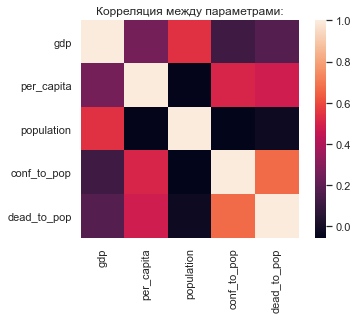

In [424]:
df_cl_1 = df_cl[['gdp','per_capita','population','conf_to_pop', 'dead_to_pop']]
cor = df_cl_1.corr()
sns.set()
sns.heatmap(cor, square = True) 
plt.title("Корреляция между параметрами:")
plt.show()

In [425]:
data = dict(type = 'choropleth', 
           locations = df_cl['country'],
           locationmode = 'country names',
           z = df_cl['conf_to_pop'], 
           text = df_cl['country'],
           colorbar = {'title':'Заражённые'})
layout = dict(title = 'Заражённые по отношению к населению(%)', 
             geo = dict(showframe = False, 
                       projection = {'type': 'mercator'}))
choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

In [426]:
data = dict(type = 'choropleth', 
           locations = df_cl['country'],
           locationmode = 'country names',
           z = df_cl['dead_to_pop'], 
           text = df_cl['country'],
           colorbar = {'title':'Умершие'})
layout = dict(title = 'Умершие по отношению к населению(%)', 
             geo = dict(showframe = False, 
                       projection = {'type': 'mercator'}))
choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

In [440]:
data = dict(type = 'choropleth', 
           locations = df_cl['country'],
           locationmode = 'country names',
           z = df_cl['gdp'], 
           text = df_cl['country'],
           colorbar = {'title':'ВВП(млрд. долларов)'})
layout = dict(title = 'ВВП в млрд. долларов США', 
             geo = dict(showframe = False, 
                       projection = {'type': 'mercator'}))
choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

In [441]:
data = dict(type = 'choropleth', 
           locations = df_cl['country'],
           locationmode = 'country names',
           z = df_cl['gdp'], 
           text = df_cl['country'],
           colorbar = {'title':'Среднедушевой доход(тыс.долларов)'})
layout = dict(title = 'Среднедушевой доход в тыс. долларов США', 
             geo = dict(showframe = False, 
                       projection = {'type': 'mercator'}))
choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

In [492]:
scaler = StandardScaler()
scaler.fit_transform(df_cl_1)

array([[-3.78782560e-01, -2.39409219e-01, -7.06285282e-01,
        -4.25024739e-02, -3.78782560e-01, -3.31498552e-01],
       [-3.27452654e-01, -2.43618559e-01, -5.12817199e-01,
        -2.59690865e-01, -3.27452654e-01, -2.91844060e-01],
       [-3.85989308e-01, -1.62153735e-01, -5.24111435e-01,
        -1.04931016e-02, -3.85989308e-01, -2.76861904e-01],
       [ 3.16254553e+00, -2.48602885e-01,  1.27167202e+00,
        -2.77350126e-01,  3.16254553e+00,  3.90122677e+00],
       [-4.47703257e-01, -1.97418473e-01, -5.57125354e-01,
        -8.27836979e-02, -4.47703257e-01, -3.60826385e-01],
       [-3.53427026e-01, -2.49376864e-01,  4.85280283e-02,
        -2.77228066e-01, -3.53427026e-01, -1.60915775e-01],
       [-3.79554668e-01,  5.17278364e-02, -6.12649732e-02,
         3.85321118e-03, -3.79554668e-01, -3.06195232e-01],
       [ 1.48714633e-01, -2.44333423e-01, -5.40509796e-01,
        -2.59150205e-01,  1.48714633e-01, -2.28443329e-01],
       [-3.44923552e-01,  4.16552158e-01,  1.964

In [493]:
# Кластеризация методом k-средних
def do_kmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)



In [494]:
clust_labels, cent = do_kmeans(df_cl_1, 2)
kmeans = pd.DataFrame(clust_labels)
df_cl_1.insert((df_cl_1.shape[1]),'kmeans',kmeans)

In [495]:
# Кластеризация с 2 параметрами
def plot_clusterization(df_cl_1,method, param_1 = "gdp" , param_2 = "conf_to_pop", title=""):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    scatter = ax.scatter(df_cl_1[param_1],df_cl_1[param_2],
                         c=method[0],s=50)
    ax.set_title(title)
    if param_1 == "gdp":
        xlabel = "ВВП (млрд.долларов)"
    elif param_1 == "per_capita":
        xlabel = "Среднедушевой доход (тыс.долларов)"
    elif param_1 == "conf_to_pop":
        xlabel = "Заразившиеся в (%) от населения"
    elif param_1 == "dead_to_pop":
        xlabel = "Умершие в (%) от населения"  
    if param_2 == "gdp":
        ylabel = "ВВП (млрд.долларов)"
    elif param_2 == "per_capita":
        ylabel = "Среднедушевой доход (тыс.долларов)"
    elif param_2 == "conf_to_pop":
        ylabel = "Заразившиеся в (%) от населения"
    elif param_2 == "dead_to_pop":
        ylabel = "Умершие в (%) от населения" 
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.colorbar(scatter)

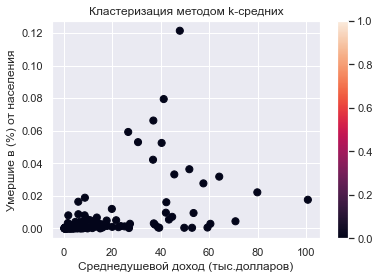

In [496]:
plot_clusterization(df_cl_1,kmeans, "per_capita" , "dead_to_pop", "Кластеризация методом k-средних")    

In [ ]:
df_cl_1 = df_cl[['gdp','per_capita','population','conf_to_pop', 'dead_to_pop']]
df_cl_1.insert(0,'country',df_cl.iloc[:,0])
df_cl_1.iloc[:,[0,1,2]]
data = [dict(type='choropleth',
             locations = df_cl_1['country'],
             locationmode = 'country names',
             z = df_cl_1['kmeans'],
             text = df_cl_1['country'],
             colorbar = {'title':'Cluster Group'})]
layout = dict(title='Clustering of Countries based on K-Means',
              geo=dict(showframe = False,
                       projection = {'type':'mercator'}))
map1 = go.Figure(data = data, layout=layout)
iplot(map1)

In [498]:
def do_agglomerative(X, nclust=2):
    model = AgglomerativeClustering(n_clusters=nclust, affinity = 'euclidean', linkage = 'ward')
    clust_labels1 = model.fit_predict(X)
    return (clust_labels1)

In [499]:
df_cl = pd.DataFrame(countries_with_gdp_and_capita)
df_cl_1 = df_cl[['gdp','per_capita','population','conf_to_pop', 'dead_to_pop']]
clust_labels1 = do_agglomerative(df_cl_1, 2)
agglomerative = pd.DataFrame(clust_labels1)
#df_cl_1.insert((df_cl_1.shape[1]),'agglomerative',agglomerative)

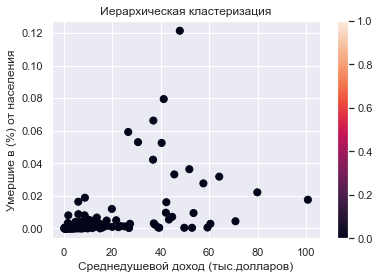

In [500]:
#Иерархическая_кластеризация
plot_clusterization(df_cl_1,agglomerative, "per_capita" , "dead_to_pop", "Иерархическая кластеризация")